In [1]:
import numpy as np
import matplotlib.pyplot as plt
import skimage.io
import skimage.color
import skimage.transform
import scipy.ndimage
import cv2 as cv
import PIL
%matplotlib inline

In [ ]:
!wget http://pm1.narvii.com/7354/68e873fd4a92810b38ae2dc639115f4842f80400r1-1200-900v2_uhq.jpg
!mv 68e873fd4a92810b38ae2dc639115f4842f80400r1-1200-900v2_uhq.jpg cat.jpg

#Загрузка изображений

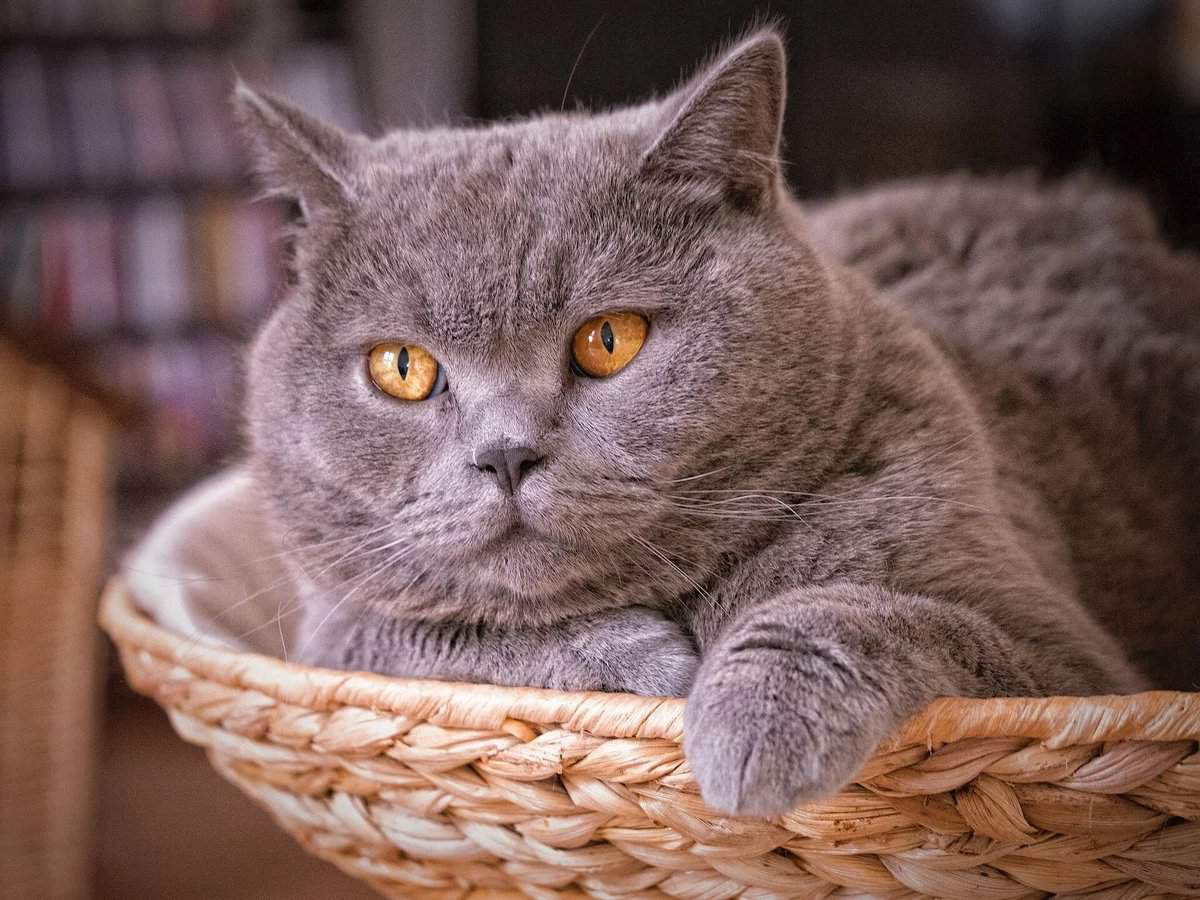

In [ ]:
cat_image = PIL.Image.open('cat.jpg')
cat_image

In [ ]:
cat_image.format, cat_image.size, cat_image.mode

('JPEG', (1200, 900), 'RGB')

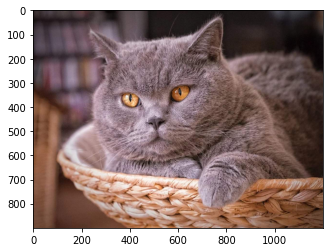

In [ ]:
cat_array = np.array(cat_image)
plt.imshow(cat_array)

Также можно сразу получить изображение в виде тензора используя библиотеки matplotlib или skimage

In [ ]:
skimage_array = skimage.io.imread('cat.jpg')
np.testing.assert_almost_equal(cat_array, skimage_array)

plt_array = plt.imread('cat.jpg')
np.testing.assert_almost_equal(cat_array, plt_array)

In [ ]:
cat_array.shape # HxWxC

(900, 1200, 3)

Каждое цветное изображение - трехканальный тензор

#Трансформации изображений

Создайте такие тензоры, чтоб в них были только данные из одного канала картинки котика, а другие каналы были занулены. Убедитесь что действительно выводится картинка в нужных тонах

In [ ]:
plt.figure(figsize=(15, 10))
zeros = #your code for creating matrix

plt.subplot(1, 3, 1)
#your code for show red channel
plt.imshow(zeros)
plt.title('Red channel')

plt.subplot(1, 3, 2)
#your code for show red channel
plt.imshow(zeros)
plt.title('Green channel')

plt.subplot(1, 3, 3)
#your code for show red channel
plt.imshow(zeros)
plt.title('Blue channel')

plt.show()

Изображения необязательно могут быть цветными, также они могут быть бинарными или в серых тонах

Формула для получения изображения в серых тонах:

$$ Y = 0.299R + 0.587G + 0.114B $$

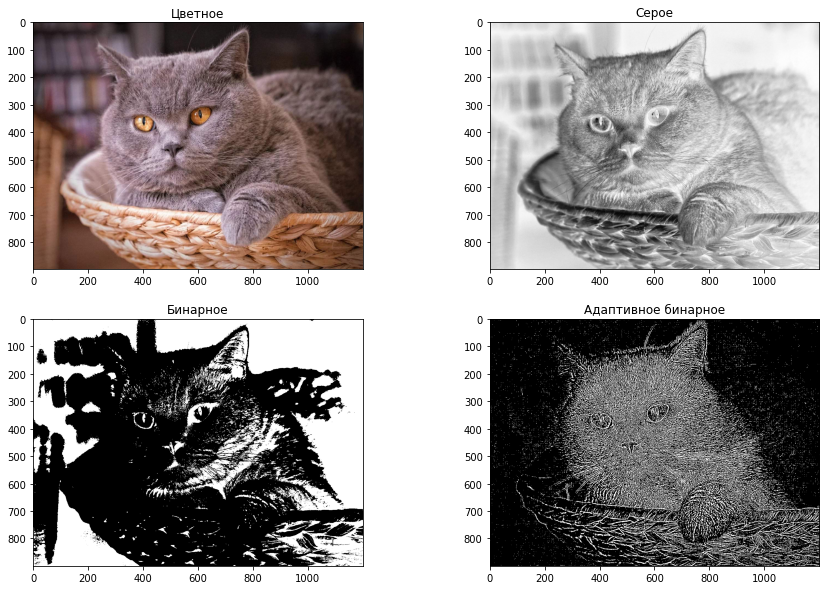

In [ ]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.title('Цветное')
plt.imshow(cat_array)

plt.subplot(2, 2, 2)
plt.title('Серое')
gray_image = cv.cvtColor(cat_array, cv.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap=plt.cm.Greys)

plt.subplot(2, 2, 3)
thresh, bin_image = cv.threshold(gray_image, 75, 75, cv.THRESH_BINARY)
plt.title('Бинарное')
plt.imshow(bin_image, cmap=plt.cm.Greys)

plt.subplot(2, 2, 4)
adaptive_bin_image = cv.adaptiveThreshold(gray_image, 255, cv.ADAPTIVE_THRESH_MEAN_C, 
                                         cv.THRESH_BINARY, 5, 5)
plt.title('Адаптивное бинарное')
plt.imshow(adaptive_bin_image, cmap=plt.cm.Greys)

plt.show()

Бинаризация бывает:


*   Глобальная (один порог для всех пикселей на фото)
*   Локальная (порог зависит от положения пикселя)
*   Адаптивная (порог зависит от положения и от яркости пикселя)



In [ ]:
np.unique(bin_image), np.unique(adaptive_bin_image)

(array([ 0, 75], dtype=uint8), array([  0, 255], dtype=uint8))

Изображения можно поворачить, сдвигать и тд по своему желанию

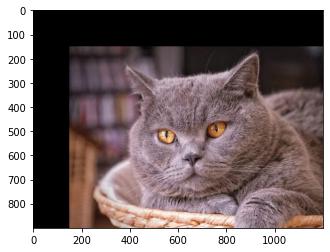

In [ ]:
shifted_image = scipy.ndimage.shift(cat_array, [150, 150, 0])
plt.imshow(shifted_image)
plt.show()

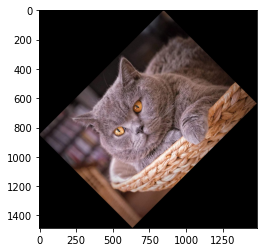

In [ ]:
rotated_image = scipy.ndimage.rotate(cat_array, 45)
plt.imshow(rotated_image)
plt.show()

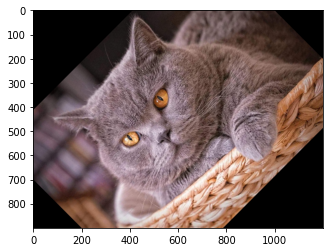

In [ ]:
rotated_image = skimage.transform.rotate(cat_array, 45) # with resize=True equal to scipy.rotate 
plt.imshow(rotated_image)
plt.show()

Задание - написать функцию, которая будет делать случайные сдвиги изображения в отрезке [-a, a] по обоим осям, а также повороты на [-b, b]

In [ ]:
def very_smart_augmentation(image_array, a, b):
    raise NotImplementedError()

In [ ]:
assert (very_smart_augmentation(cat_array, 200, 90) != cat_array).all(), "Maybe it's just chance 1e-1051251025105, but I think your code is wrong" 

a = 200
b = 90

plt.figure(figsize=(12, 7))

for i in range(4):
    plt.subplot(2, 2, i + 1)
    plt.imshow(very_smart_augmentation(cat_array, a, b))
plt.show()

#Фильтры

(Более подробно про эту сущность вы узнаете в следующем семестре на курсе ОиРИ и DL)

<img src="https://raw.githubusercontent.com/Yar4ik000/mmp_practicum_fall_2021/main/Seminars/Seminar%2004.%20Image%20processing%20and%20KNN/image_processing_src/images/sorting-median.png">

Данный фильтр называется медианным. С его помощью можно удалять шумы с фото

In [ ]:
!wget https://turkmenportal.com/images/uploads/blogs/b1cec01f147f463a30d6ecb03fb74900.jpg
!mv b1cec01f147f463a30d6ecb03fb74900.jpg msu.jpg
msu_array = skimage.io.imread('msu.jpg')
msu_gray = cv.cvtColor(msu_array, cv.COLOR_BGR2GRAY)

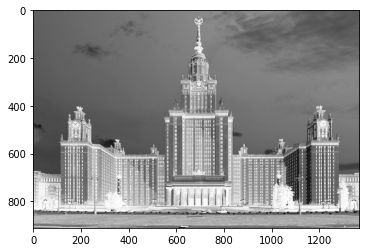

In [ ]:
plt.imshow(msu_gray, cmap=plt.cm.Greys)
plt.show()

Создайте случайный шумовые точки и добавьте их в картинку копию. После чего используйте медианный фильтр (scipy.ndimage.median_filter), чтобы исправить картинку любимого вуза

In [ ]:
img_copy = msu_gray.copy()
noice_x_coords = 0 #your_code_here
noice_y_coords = 0 #your_code_here
#your code here

plt.figure(figsize=(12, 7))

plt.subplot(1, 2, 1)
plt.imshow(img_copy, cmap=plt.cm.Greys)

plt.subplot(1, 2, 2)
msu_filtered = 0 #your code here
plt.imshow(msu_filtered, cmap=plt.cm.Greys)
plt.show()

Пример применения гауссовского фильтра, позволяющего размыть фото.
$$ Y[i, j] = \sum_{l = -k}^k \sum_{m = -k}^k X[i + l, j + m] \frac{1}{\sqrt{2 \pi \sigma}} \exp\left(-\frac{\sqrt{l^2 + m^2}}{2\sigma^2}\right)
 $$

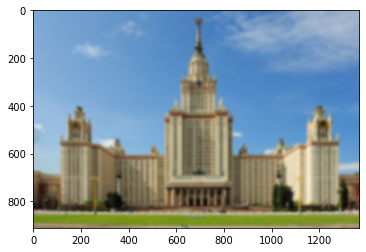

In [5]:
blured_msu = cv.GaussianBlur(msu_array, (25, 25), 5)
plt.imshow(blured_msu)
plt.show()

Выделение контуров изображения с помощью фильтров

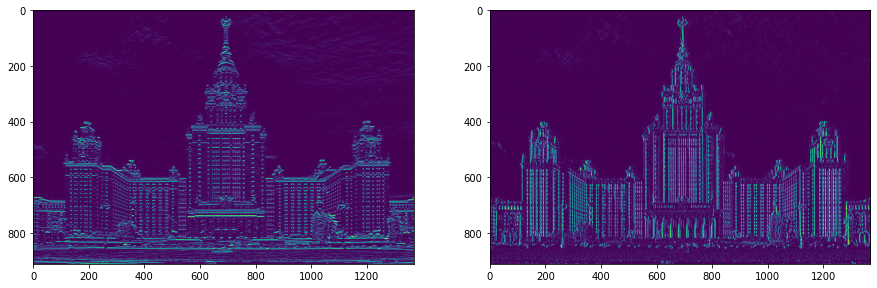

In [ ]:
plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
kernel = np.array([[1, 2, 1], 
                   [0, 0, 0],
                   [-1, -2, -1]])
msu_horizontal = cv.filter2D(msu_gray, 0, kernel)
plt.imshow(msu_horizontal)

plt.subplot(1, 2, 2)
kernel = np.array([[1, 0, -1], 
                   [2, 0, -2],
                   [1, 0, -1]])
msu_vertical = cv.filter2D(msu_gray, 0, kernel)
plt.imshow(msu_vertical)
plt.show()

#Примеры использования обработки изображений


*   Предобработка входных изображений (Удаление шума, преобразование цветов)
*   Постобработка изображений (Удаление шумовых объектов, отверстий)
*   Выделение дополнительных признаков (Выделение важных объектов, областей)
*   Аугментация объектов (Преобразование объектов в ходе обучения/применения
модели)

<img src="https://scikit-image.org/docs/dev/_images/sphx_glr_plot_morphsnakes_001.png">

Хороший пример использования трансформаций: датасет MNIST

<img src="https://raw.githubusercontent.com/Yar4ik000/mmp_practicum_fall_2021/main/Seminars/Seminar%2004.%20Image%20processing%20and%20KNN/image_processing_src/images/mnist.png">

Класс изображения не меняется при:


*   сдвигах на 1-10 пикселей
*   поворотах на 10-15 градусов в каждую из сторон
*   размытии, удалении шумов

Добавив преобразованные объекты в исходную выборку, можно
существенно повысить качество

Часто используемые методы аугментации:
* отражение
* сдвиг
* поворот
* масштабирование (увеличение)
* добавление шума, размытие
* изменение яркости, контрастности, цветовой гаммы
* удаление части изображения

Пример использования: детектирование действий водителя.

(Детектировать запрещённые действия водителей по видео)

<img src="https://raw.githubusercontent.com/Yar4ik000/mmp_practicum_fall_2021/main/Seminars/Seminar%2004.%20Image%20processing%20and%20KNN/image_processing_src/images/faces_car.png">